In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [38]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
df = pd.read_csv(url)
df=pd.DataFrame(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Data has 1599 rows and 12 columns

In [39]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data

In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Above data shows that there are outliers in all apart from density, pH and alcohol columns
While very common in citrus fruits, such as limes, citric acid is found only in very minute quantities in wine grapes. It often has a concentration about 1/20 that of tartaric acid. So, its value can be very close to 0, or even 0 (traces)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All data is in float or int type. We can proceed with the manipulation

In [43]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Preparing the output into 2 different data points without imbalance

In [45]:
df['quality'] = df['quality'].replace([1,3,4,5], 0)
df['quality'] = df['quality'].replace([6,7,8], 1)
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [46]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


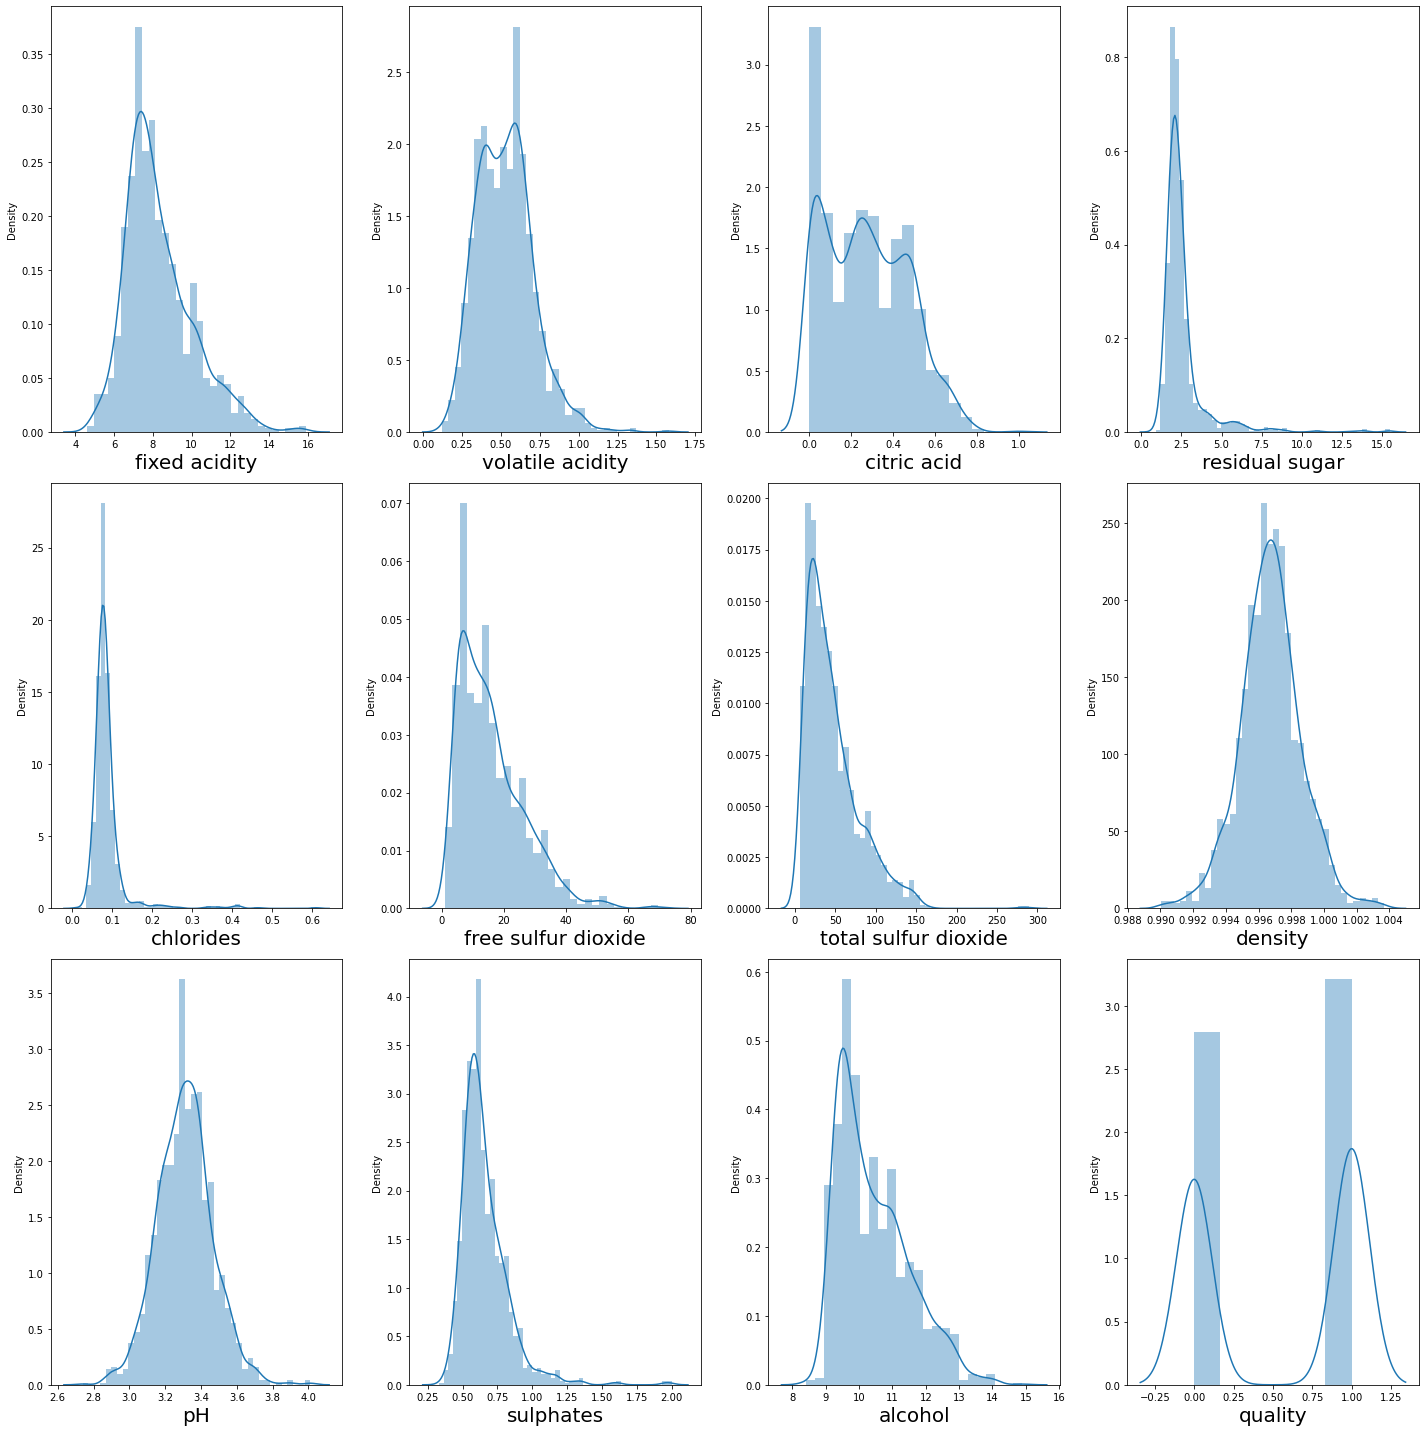

In [47]:
plt.figure(figsize=(20,20))
plotnumber = 1
for c in df:
    ax= plt.subplot(3,4,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

Since most of the data is left skewed, we will not take the absolute z score and will clean the data as it is.

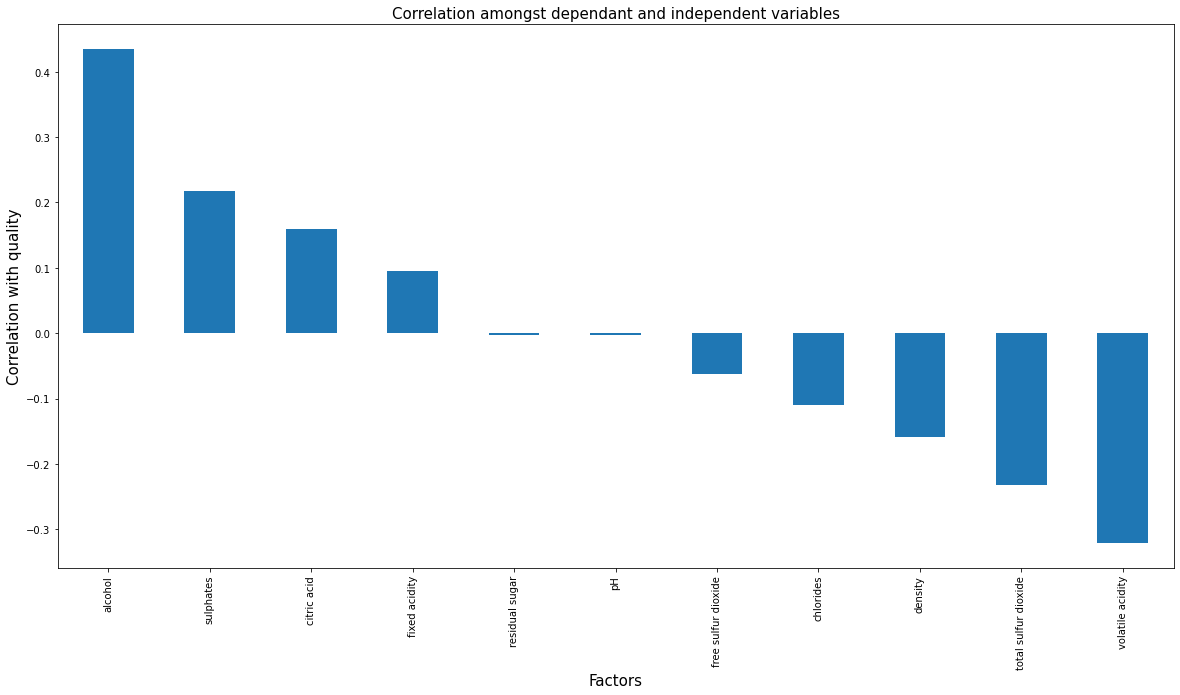

In [48]:
df2 = df.corr()
plt.figure(figsize=(20,10))
df2['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('Factors', fontsize = 15)
plt.ylabel('Correlation with quality', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()
['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH'],

Correlation with residual sugar and pH is very low while that with alcohol, volatile acidity, sulphates and total sulphur dioxide is high

In [49]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

The skew is very high for all apart from citric acid, density, pH, sulphates and alcohol. There is a need to normalize the data

In [90]:
from scipy.stats import zscore
z= zscore(df.drop(columns=['quality'])) #not taking aboslute values because it is all skewed left
dfn=df[(z<3).all(axis=1)]
dfn.shape

(1463, 12)

In [92]:
X = dfn.drop(columns = ['quality'])
y = dfn['quality']
X.shape

(1463, 11)

Outliers removed, resulting in 1463 remaining rows

In [96]:
1463/1599

0.9149468417761101

Less than 10% data is lost. We can go ahead 

In [97]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,8.307656,0.523161,0.265605,2.388004,0.081367,15.156528,43.851675,0.996696,3.315612,0.641805,10.424846
std,1.648208,0.169908,0.191082,0.867021,0.021391,9.372631,29.551814,0.001756,0.141777,0.130082,1.027836
min,5.000000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.632500,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000


Description conveys skewness lingering.

In [99]:
X.skew()

fixed acidity           0.819287
volatile acidity        0.387626
citric acid             0.288871
residual sugar          2.430731
chlorides               2.212135
free sulfur dioxide     0.862879
total sulfur dioxide    1.170933
density                -0.077017
pH                      0.086362
sulphates               0.882415
alcohol                 0.758634
dtype: float64

The skewness is not removed completely.

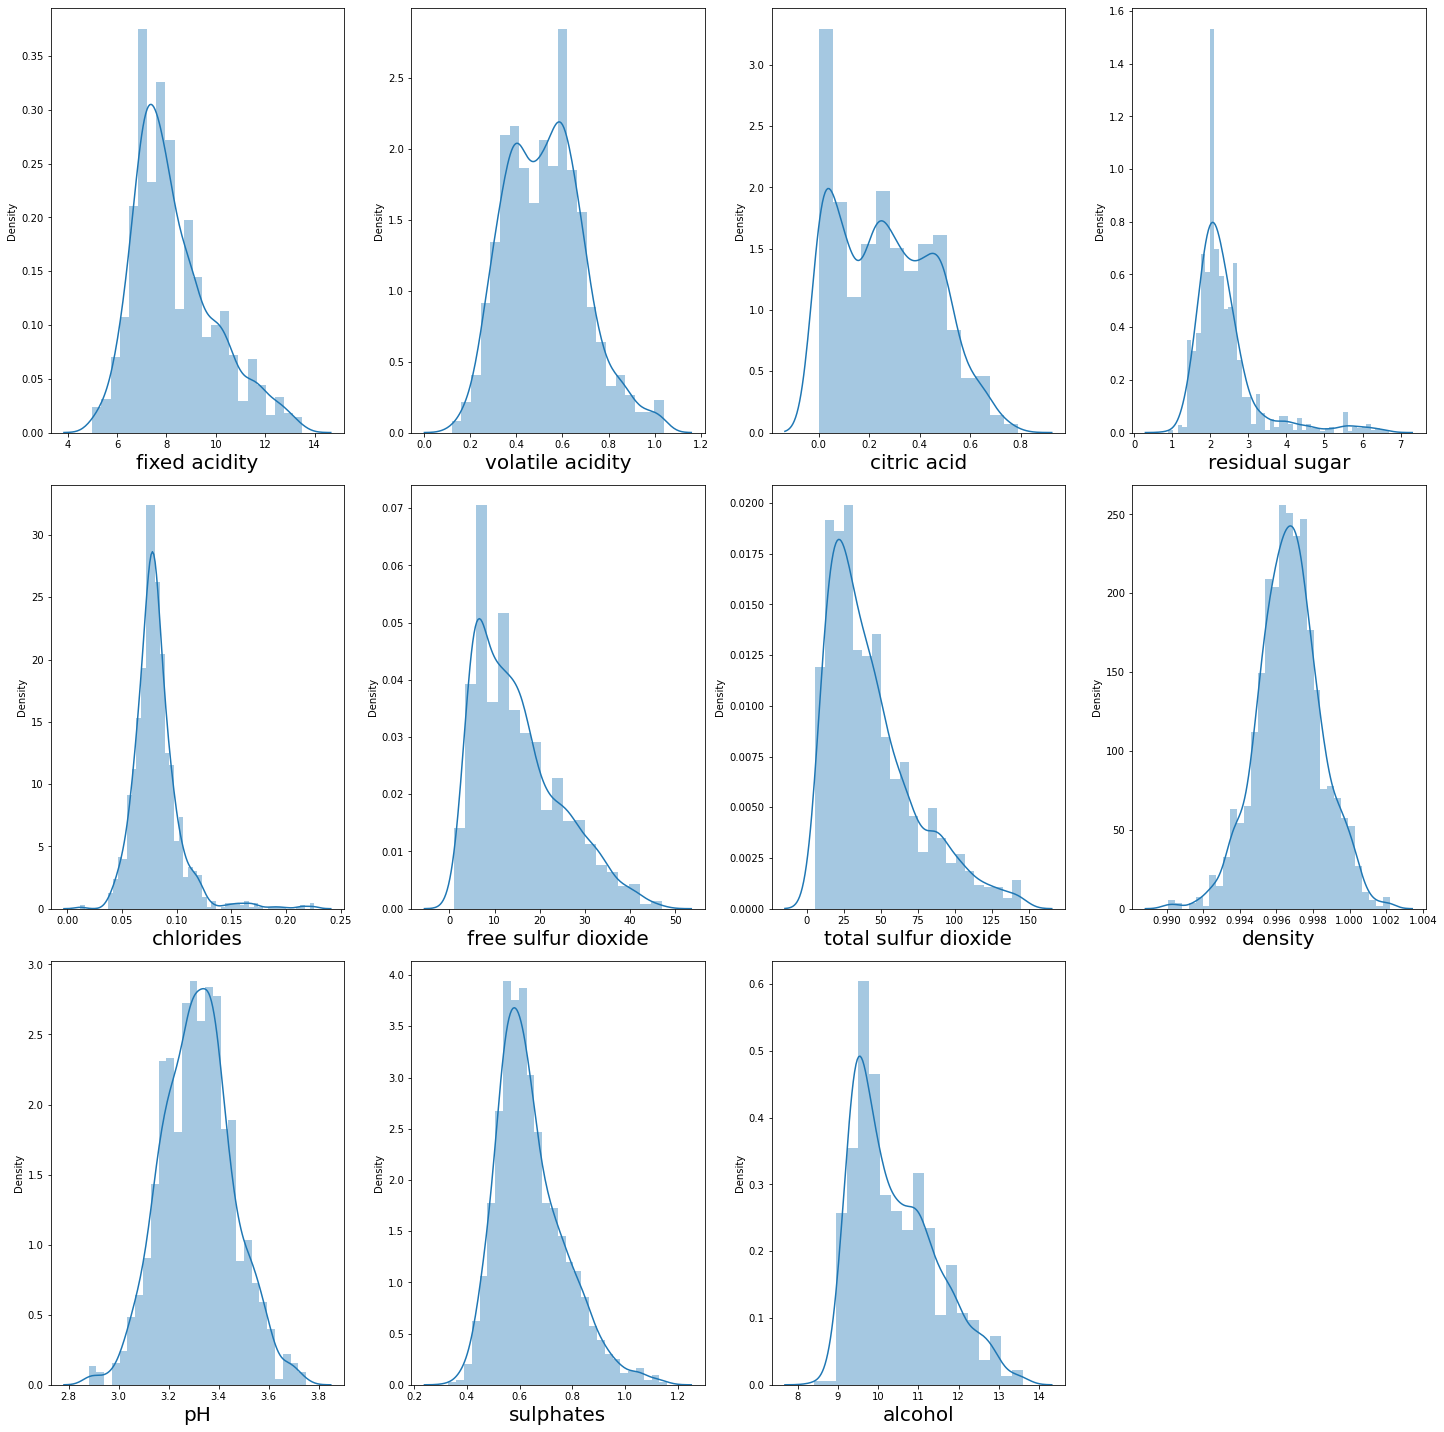

In [98]:
plt.figure(figsize=(20,20))
plotnumber = 1
for c in X:
    ax= plt.subplot(3,4,plotnumber)
    sns.distplot(xnew[c])  
    plt.xlabel(c,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There still are outliers in chlorides and residual sugar. 

In [100]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
X1= X.copy()
X1= power.fit_transform(X1)
X1 = pd.DataFrame(X1)
X1.columns = X.columns
X1.skew()

fixed acidity           0.017514
volatile acidity        0.005017
citric acid             0.017641
residual sugar         -0.055777
chlorides              -0.218413
free sulfur dioxide    -0.021555
total sulfur dioxide   -0.006117
density                 0.003590
pH                      0.000168
sulphates               0.019001
alcohol                 0.108877
dtype: float64

In [101]:
X1.shape

(1463, 11)

0 data lost with skewness removed and data scaled. Data prepared for modelling. 

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
     # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = Data.columns
     vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
     return(pd.DataFrame(vif))

In [103]:
CalculateVIF(X1)

,FeatureColumns,VIF
0,fixed acidity,6.870791
1,volatile acidity,1.967517
2,citric acid,3.002001
3,residual sugar,1.663978
4,chlorides,1.277326
5,free sulfur dioxide,2.872999
6,total sulfur dioxide,3.201304
7,density,5.715105
8,pH,3.142255
9,sulphates,1.367563


Since fixed acidity and density are collinear, we will remove fixed acidity from the factors

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k=7)
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(7,'Score'))

            Feature name       Score
10               alcohol  357.936428
9              sulphates  177.498929
1       volatile acidity  144.947658
6   total sulfur dioxide   98.313143
2            citric acid   44.080726
7                density   37.009569
0          fixed acidity   18.118358


From the above, we will take only the features that are of a score above 20 to model. 

In [105]:
X1 = X1.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH'], axis=1)
X1

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,1.047604,-1.523551,-0.069044,0.622732,-0.580140,-1.114283
1,1.903776,-1.523551,0.947202,0.048418,0.453884,-0.531134
2,1.346286,-1.245150,0.619752,0.162718,0.223433,-0.531134
3,-1.545662,1.442550,0.779217,0.738442,-0.385453,-0.531134
4,1.047604,-1.523551,-0.069044,0.622732,-0.580140,-1.114283
...,...,...,...,...,...,...
1458,0.516248,-0.980443,0.312480,-1.023559,-0.385453,0.280101
1459,0.233181,-0.852861,0.533630,-0.900711,0.993763,0.893238
1460,-0.002440,-0.667084,0.170732,-0.552714,0.931656,0.734611
1461,0.760834,-0.728284,0.312480,-0.704587,0.668319,-0.039217


In [107]:
x_train, x_test, y_train, y_test = train_test_split(X1,y, test_size = 0.25, random_state = 55)

Data for modelling prepared

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
knn = KNeighborsClassifier()
lreg = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [126]:
lreg.fit(x_train, y_train)
dt.fit(x_train, y_train)
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [128]:
print(lreg.score(x_test, y_test), dt.score(x_test, y_test), knn.score(x_test, y_test), rf.score(x_test, y_test))
print(roc_auc_score(y_test, rf.predict(x_test)), roc_auc_score(y_test, lreg.predict(x_test)),
     roc_auc_score(y_test, knn.predict(x_test)), roc_auc_score(y_test, dt.predict(x_test)))

0.7295081967213115 0.7513661202185792 0.7103825136612022 0.7978142076502732
0.796246408045977 0.7273706896551725 0.7088721264367817 0.7476652298850573


Random Forest is the best algorithm. with 79.78% accuracy and roc-auc score of 79.62%

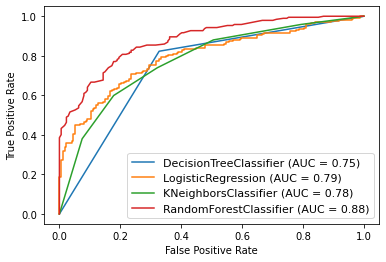

In [129]:
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lreg, x_test, y_test, ax=disp.ax_) #ax_ = axes with confusion matrix. look at the axes below
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plt.legend(prop = {'size': 11}, loc = 'lower right') # loc gives location of legend
plt.show()

Highest area under the curve is that of Random Forest Classifier

In [136]:
params = {'bootstrap': [True, False],
          'n_estimators': [3,4,5,6],
          'max_depth': [3,4,5,6,7],
         'criterion' : ['entropy', 'gini'],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3,4,5]}
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print(grd.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 3}


In [167]:
rc = grd.best_estimator_ #reinstating best params that we received.
rc.fit(x_train, y_train)
y_pre = rc.predict(x_test)

In [168]:
rc.score(x_test, y_test)

0.7377049180327869

In [171]:
#HPT of logistic regression model
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lreg_cv = GridSearchCV(lreg, grid, cv = 5)
lreg_cv.fit(x_train, y_train)
logreg = lreg_cv.best_estimator_
logreg.score(x_test, y_test)

0.7240437158469946

Logistic regression is not overfitted but fails against Random Forest. 

In [173]:
dtparams = {'max_depth': [3,4,5,6,7],
         'criterion' : ['entropy', 'gini'],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3,4,5]}
grd = GridSearchCV(dt, param_grid = dtparams)
grd.fit(x_train, y_train)
print(grd.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [174]:
dt1 = grd.best_estimator_ #reinstating best params that we received.
dt1.fit(x_train, y_train)
y_pre = dt1.predict(x_test)
dt1.score(x_test, y_test)

0.7021857923497268

The model is not as accurate as Random forest 

In [141]:
#Applying GSCV to KNN model.
from sklearn.model_selection import GridSearchCV
knnp = {'algorithm': ['kd_tree', 'brute'],
           'leaf_size': [1,3,5,7,9,11,13,15,17,18,20,22,24,26,28,30],
           'n_neighbors': [7,11,12,13,15,17,19]}
knnp

{'algorithm': ['kd_tree', 'brute'],
 'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 18, 20, 22, 24, 26, 28, 30],
 'n_neighbors': [7, 11, 12, 13, 15, 17, 19]}

In [143]:
gsknn = GridSearchCV(estimator=knn, param_grid = knnp)
gsknn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15, 17, 18, 20,
                                       22, 24, 26, 28, 30],
                         'n_neighbors': [7, 11, 12, 13, 15, 17, 19]})

In [144]:
gsknn.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 11}

In [169]:
knnb = gsknn.best_estimator_
knnb.fit(x_train, y_train)
knnb.score(x_test, y_test)

0.7131147540983607

The accuracy stays similar. Loses out to Random forest model.

The most accurate model is Random Forest. 

In [175]:
import joblib
joblib.dump(rf, "./wq.joblib")
#file saved

['./wq.joblib']